In [119]:
import pandas as pd
import numpy as np
import preprocessor
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import importlib

In [120]:
%matplotlib inline

In [121]:
prediction_variable = "int_rate"

# need to include int_rate, installment here since it is determined by the loan grade, which we are trying to predict
extraneous_cols = ["out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries",
				   "collection_recovery_fee", "next_pymnt_d", "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d", "acc_now_delinq",
				   "sub_grade", "issue_d", "initial_list_status", "loan_amnt", "funded_amnt_inv", "emp_title", "pymnt_plan", "zip_code", "title",
                   "addr_state", "earliest_cr_line", "loan_status", "hardship_flag", "application_type", "grade", "installment"]

important_cols = ["annual_inc", "verification_status", "term", "home_ownership", "emp_length",
				  "funded_amnt"] #add back delinq_2yrs, dti, inq_last_6mths

In [122]:
importlib.reload(preprocessor)

lc = preprocessor.loadData([#"data/LC_2007_2011_loan_data.csv",
							#"data/LC_2012_2013_loan_data.csv",
							"data/LC_2014_loan_data.csv",
                            "data/LC_2015_loan_data.csv",
                            "data/LC_2016q1_loan_data.csv",
                            "data/LC_2016q2_loan_data.csv"], extraneous_cols)

In [123]:
lc.reset_index(drop = True, inplace = True)
lc = preprocessor.dropExtraCols(lc, important_cols)
lc = preprocessor.replacements(lc)
lc = preprocessor.fillnas(lc)

In [124]:
#create dummy variables for categorical variables
lc = pd.get_dummies(lc, columns=["home_ownership", "verification_status", "purpose"])

In [134]:
lc = lc.loc[lc["term"] == 36]

In [135]:
print("Dimensions: ", lc.shape)
lc.head(5)

Dimensions:  (616400, 74)


int_rate  funded_amnt  term  emp_length  annual_inc    dti  delinq_2yrs  \
0      6.99      10400.0    36           8     58000.0  14.92          0.0   
4     13.66       9600.0    36          10     69000.0  25.81          0.0   
5     13.66       7650.0    36           0     50000.0  34.81          0.0   
6     11.99       2500.0    36           0     89000.0  13.77          0.0   
9     14.31      23325.0    36          10     72000.0  27.03          1.0   

   inq_last_6mths  mths_since_last_delinq  open_acc       ...         \
0             2.0                    42.0      17.0       ...          
4             0.0                    30.0      12.0       ...          
5             1.0                    30.0      11.0       ...          
6             1.0                    55.0       9.0       ...          
9             0.0                     1.0      14.0       ...          

   purpose_home_improvement  purpose_house  purpose_major_purchase  \
0                         0              0                       0   
4                         0              0                       0   
5                         0              0                       0   
6                         1              0                       0   
9                         0              0                       0   

   purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  \
0                0               0              0                         0   
4                0               0              0                         0   
5                0               0              0                         0   
6                0               0              0                         0   
9                0               0              0                         0   

   purpose_small_business  purpose_vacation  purpose_wedding  
0                       0                 0                0  
4                       0                 0                0  
5                       0                 0                0  
6                       0                 0                0  
9                       0                 0                0  

[5 rows x 74 columns]

In [136]:
#reorder columns so variable being predicted is in first column
cols = lc.columns.tolist()
cols.insert(0, cols.pop(cols.index(prediction_variable)))
lc = lc.loc[:, cols]

In [137]:
data = lc.values
X = data[:, 1:]
y = data[:, 0]

In [138]:
#le = LabelEncoder()
#le.fit(y)
#y_encoded = le.transform(y)

#use fit_transform in the future to just modify y directly

In [139]:
#rf = RandomForestClassifier(n_estimators=100)
#skf = StratifiedKFold(n_splits = 5, shuffle = True)
#print("Cross-validation scores:\n{}".format(cross_val_score(rf, X, y_encoded, cv=skf, n_jobs=-1)))

In [140]:
#for col in lc.columns:
#    if "Aug-2017" in lc[col].values:
#        print(col)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
rf_tt = RandomForestRegressor(n_estimators = 100, n_jobs = -1)
rf_tt.fit(X_train, y_train)
print("Training accuracy: {:.2f}".format(rf_tt.score(X_train, y_train)))
print("Generalization accuracy: {:.2f}".format(rf_tt.score(X_test, y_test)))

Generalization accuracy: 0.52


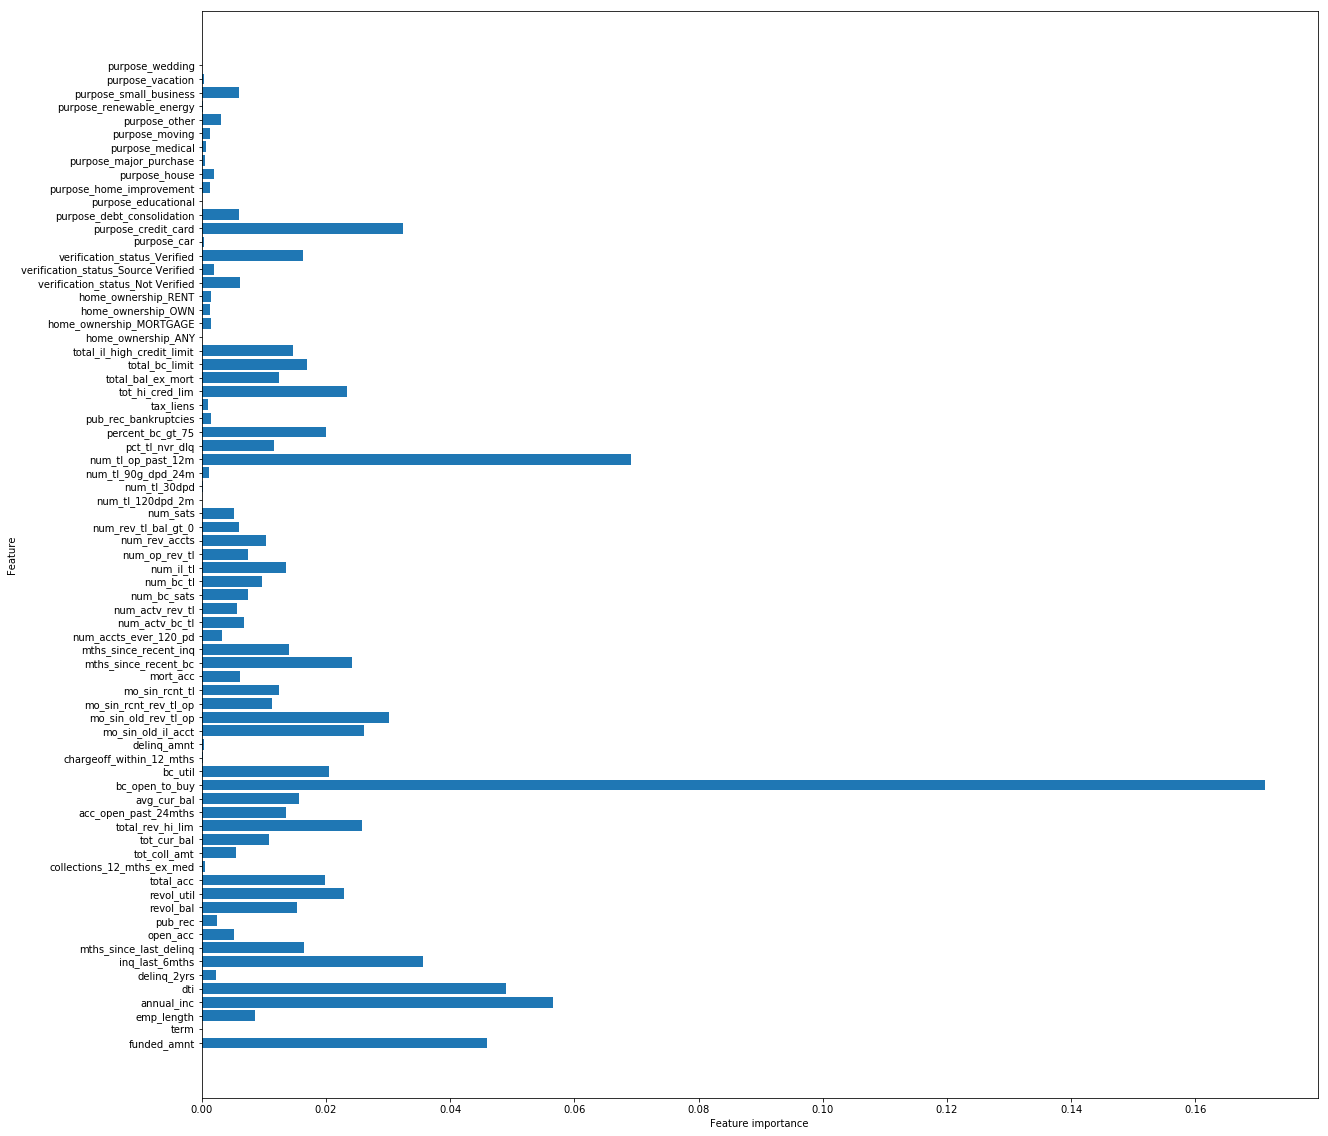

In [142]:
def plot_feature_importances (model):
    n_features = len(lc.columns.tolist()[1:])
    plt.figure(figsize=(20, 20))
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), lc.columns.tolist()[1:])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(rf_tt)

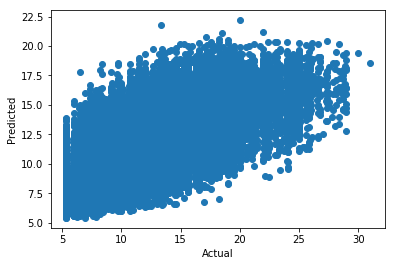

In [143]:
def plot_results_scatter (y_predict, y_test):
    plt.scatter(y_test, y_predict)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    
plot_results_scatter(rf_tt.predict(X_test), y_test)

In [144]:
rf_500est = RandomForestRegressor(n_estimators = 500, n_jobs = -1)
rf_500est.fit(X_train, y_train)
print("Training accuracy: {:.2f}".format(rf_500est.score(X_train, y_train)))
print("Generalization accuracy: {:.2f}".format(rf_500est.score(X_test, y_test)))

Training accuracy: 0.93
Generalization accuracy: 0.52
